# **Importing necessary libraries**

In [31]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

# **Fetching california house price data from SkLearn**

In [46]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['price'] = housing.target
print('Shape of Dataset:',df.shape)
df.head()

Shape of Dataset: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# **Checking for any Null/Na values**

In [33]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


# Normalizing Data by Log1p functions (Skipping price column)

In [57]:
for col in df.columns.drop('price'):
  df[col]=np.log1p(df[col])

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,price
0,1.173324,1.555545,1.124103,0.533554,1.913631,0.819124,1.539118,4.526
1,1.172533,1.408800,1.091710,0.518191,2.172938,0.758266,1.539008,3.585
2,1.134980,1.603479,1.172091,0.547666,1.975273,0.848267,1.538953,3.521
3,1.062494,1.603479,1.071402,0.547558,1.991450,0.818179,1.538953,3.413
4,0.947090,1.603479,1.093729,0.549789,1.993147,0.768877,1.538953,3.422


# **Dropped Nan column 'Longitude' due to negative values in it**

In [48]:
df.drop('Longitude',axis=1,inplace=True)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,price
0,2.232720,3.737670,2.077455,0.704982,5.777652,1.268511,3.660480,4.526
1,2.230165,3.091042,1.979364,0.678988,7.784057,1.134572,3.659965,3.585
2,2.111110,3.970292,2.228738,0.729212,6.208590,1.335596,3.659708,3.521
3,1.893579,3.970292,1.919471,0.729025,6.326149,1.266369,3.659708,3.413
4,1.578195,3.970292,1.985385,0.732888,6.338594,1.157342,3.659708,3.422


# **Ploting Box plot for every columns and analyzing their remaining outliers**

<ipython-input-49-2796659602>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


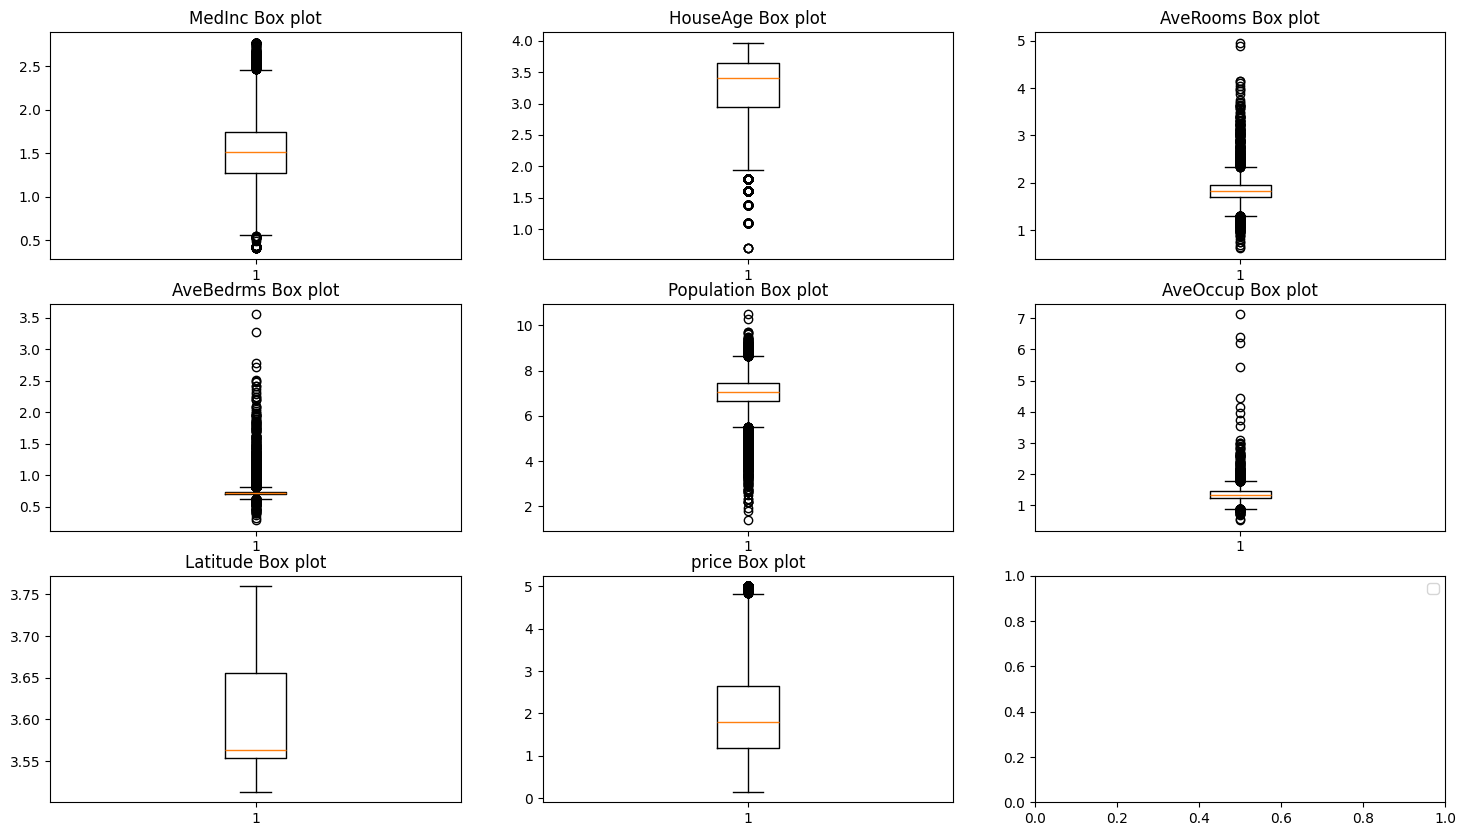

In [49]:
fig,axes=plt.subplots(3,3,figsize=(18,10))
axes=axes.flatten()

for i,col in zip(axes,df.columns):
  i.boxplot(df[col])
  i.set_title(f'{col} Box plot')

plt.legend()
plt.show()

# **Splitting Dataset**

In [50]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_df.drop(columns='price')
y_train = train_df['price']

# **Defining model**

In [51]:
Model=tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

Model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name='mae'),
        tf.keras.metrics.RootMeanSquaredError(name='rmse')
    ]
)

# **Training model**

In [52]:
Model.fit(X_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.9010 - mae: 0.6729 - rmse: 0.9210
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4756 - mae: 0.5090 - rmse: 0.6896
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4821 - mae: 0.5118 - rmse: 0.6943
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4622 - mae: 0.5005 - rmse: 0.6797
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4550 - mae: 0.4941 - rmse: 0.6743
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4608 - mae: 0.4991 - rmse: 0.6788
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4559 - mae: 0.4957 - rmse: 0.6751
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4602 - mae: 0.4903 - rmse: 0.6782
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4418 - mae: 0.4843 - rmse: 0.6644
Epoch 10/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4590 - mae: 0.4940 - rmse: 0.6774


# **Analyzing predictions**

In [53]:
X_test=test_df.drop(columns='price')
y_test=test_df['price']

In [54]:
prediction=Model.predict(X_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [56]:
print(prediction[:100])

[[0.87164396]
 [1.5849735 ]
 [4.294479  ]
 [2.963214  ]
 [2.2206242 ]
 [2.4544759 ]
 [3.1554208 ]
 [2.081394  ]
 [2.4374893 ]
 [4.8579288 ]
 [1.4496949 ]
 [2.172659  ]
 [2.1166785 ]
 [1.9660951 ]
 [3.1487758 ]
 [2.5491219 ]
 [2.3688488 ]
 [2.1662471 ]
 [2.5829823 ]
 [1.072144  ]
 [4.198578  ]
 [3.5395908 ]
 [2.4221282 ]
 [3.9767237 ]
 [2.370928  ]
 [1.3737799 ]
 [2.0142663 ]
 [1.9992156 ]
 [1.9440237 ]
 [3.9606616 ]
 [0.78866065]
 [0.93456924]
 [1.8300201 ]
 [3.5577452 ]
 [2.2034295 ]
 [3.2189248 ]
 [2.7192338 ]
 [2.130095  ]
 [1.9307683 ]
 [1.6024214 ]
 [3.5226405 ]
 [1.9550527 ]
 [1.0771834 ]
 [2.4374034 ]
 [2.0478764 ]
 [2.0116756 ]
 [2.2054446 ]
 [2.0872936 ]
 [2.1531227 ]
 [1.682086  ]
 [2.238846  ]
 [2.1721897 ]
 [2.0072718 ]
 [0.96280336]
 [1.9374056 ]
 [2.6406493 ]
 [1.1045223 ]
 [3.1144602 ]
 [2.6574452 ]
 [3.1035502 ]
 [3.585028  ]
 [1.777747  ]
 [1.152615  ]
 [1.3877076 ]
 [3.7034633 ]
 [2.1747751 ]
 [1.5095426 ]
 [1.818622  ]
 [2.2586167 ]
 [1.5695082 ]
 [1.7502588 ]
 [3.09